In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#한글설정
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [6]:
df = pd.read_csv('dogs.csv')
df.head()

,읍면동(법정동),동물등록수19,동물등록수20,동물등록수21.2,동물등록수21.4,동물소유자당_동물등록수19,동물소유자당_동물등록수20,동물소유자당_동물등록수21.2,동물소유자당_동물등록수21.4
0,율동,52.0,52,54,58,1.0,1.37,1.35,1.35
1,구미동,2291.0,2448,2590,2666,1.0,1.25,1.26,1.26
2,궁내동,114.0,133,137,142,1.0,1.33,1.28,1.29
3,금곡동,1477.0,1575,1681,1727,1.0,1.25,1.26,1.26
4,대장동,47.0,52,51,53,2.0,1.79,1.82,1.83


In [14]:
df.dtypes

읍면동(법정동)             object
동물등록수19             float64
동물등록수20               int64
동물등록수21.2             int64
동물등록수21.4             int64
동물소유자당_동물등록수19      float64
동물소유자당_동물등록수20      float64
동물소유자당_동물등록수21.2    float64
동물소유자당_동물등록수21.4    float64
dtype: object

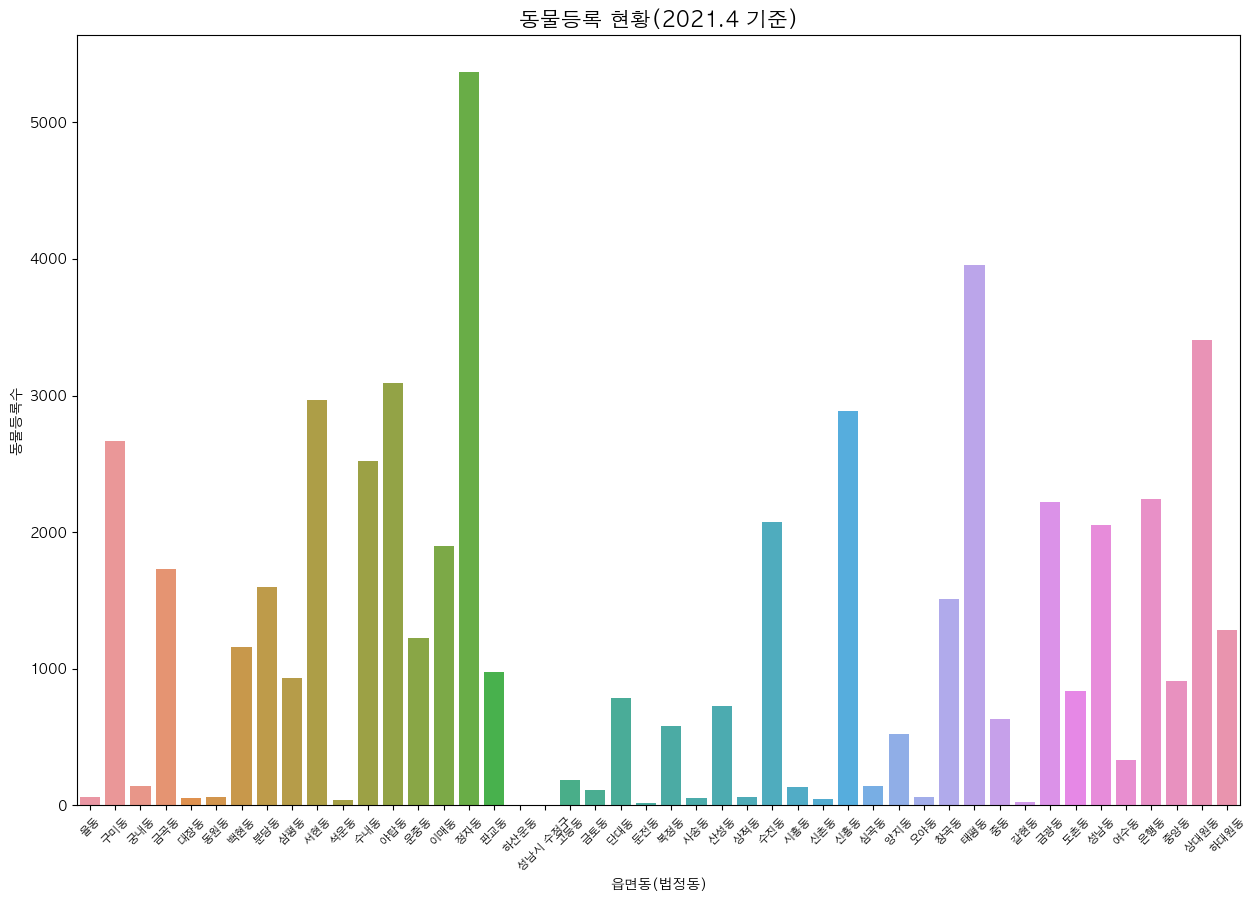

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(data = df, x = '읍면동(법정동)', y = '동물등록수21.4')
plt.xticks(size=8,rotation=45)
plt.ylabel('동물등록수')
plt.title('동물등록 현황(2021.4 기준)',size = 15)
plt.show()

In [37]:
dd = df.sort_values('동물등록수21.4',ascending=False).head(n=10)

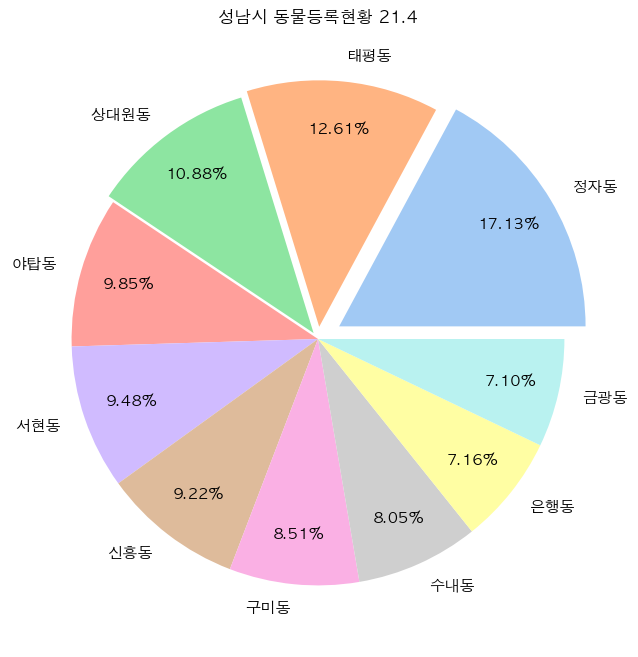

In [64]:
explode = [0.1,0.05,0.03,0,0,0,0,0,0,0,]
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:10]
plt.pie(dd['동물등록수21.4'], labels=dd['읍면동(법정동)'],colors=colors,autopct='%.2f%%',pctdistance=0.8,
       textprops={"fontsize" : 11}, explode = explode)
plt.title('성남시 동물등록현황 21.4')
plt.show()

In [5]:
cc = pd.read_csv('cctv.csv',encoding='cp949')
cc.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치연월,관리기관전화번호,위도,경도,데이터기준일자
0,경기도 성남시청,경기도 성남시 분당구 서현로429번길 30,경기도 성남시 분당구 분당동 108-1번지 맞은편,생활방범,3,41,NaN,NaN,Apr.11,031-729-2482,37.376759,127.144970,2018.4.1
1,경기도 성남시청,경기도 성남시 분당구 예원로 7,경기도 성남시 분당구 분당동 45번지(동아빌라와 옴니빌라 사이),생활방범,2,200,NaN,NaN,Mar.13,031-729-2482,37.371351,127.133744,2018.4.1
2,경기도 성남시청,NaN,경기도 성남시 분당구 백현동 606번지 물방울어린이공원 내부,생활방범,4,200,NaN,NaN,Sep.16,031-729-2482,37.386671,127.115881,2018.4.1
3,경기도 성남시청,NaN,경기도 성남시 분당구 야탑3동 197-2(버스정류장),생활방범,5,200,NaN,NaN,Sep.17,031-729-2482,37.408131,127.142901,2018.4.1
4,경기도 성남시청,NaN,경기도 성남시 분당구 야탑동 159-8,생활방범,4,200,NaN,NaN,Dec.17,031-729-2482,37.405361,127.155231,2018.4.1


In [110]:
cc['소재지지번주소'].str.split(' ')

0                      [경기도, 성남시, 분당구, 분당동, 108-1번지, 맞은편]
1             [경기도, 성남시, 분당구, 분당동, 45번지(동아빌라와, 옴니빌라, 사이)]
2               [경기도, 성남시, 분당구, 백현동, 606번지, 물방울어린이공원, 내부]
3                     [경기도, 성남시, 분당구, 야탑3동, 197-2(버스정류장)]
4                             [경기도, 성남시, 분당구, 야탑동, 159-8]
                              ...                        
1559    [경기도, 성남시, 분당구, 정자3동, 231-6, 맞은편, (정자공원, 쪽, 인도변)]
1560                  [경기도, 성남시, 분당구, 정자3동, 240번지(창조유치원)]
1561             [경기도, 성남시, 분당구, 정자3동, 203번지, 불정초등학교, 후문]
1562           [경기도, 성남시, 수정구, 신흥2동, 30번지, 성남신흥초등학교, 정문앞]
1563        [경기도, 성남시, 수정구, 단대동, 94-3번지(변경전, :, 157-1번지)]
Name: 소재지지번주소, Length: 1564, dtype: object

In [88]:
import pandas as pd
import requests 
import sys
import json
import datetime
def json_request(url='', encoding='utf-8', success=None, error=lambda e: print('%s : %s' % (e, datetime.now()), file=sys.stderr)):
    headers = {'Authorization': 'KakaoAK {}'.format(APP_KEY)}
    resp = requests.get(url, headers=headers)
    # print('%s : success for request [%s]' % (datetime.now(), url))
    return resp.text

def reverse_geocode(longitude, latitude):
    # 파라미터 최적화하여 url 생성
    url = '%s?x=%s&y=%s' %(URL, longitude, latitude)
    # json request
    try:
        # print('try')
        json_req = json_request(url=url)
        json_data = json.loads(json_req)
        json_doc = json_data.get('documents')[1]
        json_name = json_doc.get('address_name')
        json_code = json_doc.get('code')
    except:
        # print('nan')
        json_name = 'NaN'
        json_code = 'NaN'
    return json_name, json_code

 
def get_address(x,y):
    address = []
    json_name, json_code = reverse_geocode(x, y) 
    address.append(json_name)
    return address # 전처리 함수에서 주소 리스트 받아서 데이터프레임에 추가


def get_code(x,y):
    code = []
    json_name, json_code = reverse_geocode(x, y) 
    code.append(json_code)
    return code # 전처리 함수에서 행정구역코드 리스트 받아서 데이터프레임에 추가
# 행정동코드
APP_KEY = 'c5824bd5dfb7bffcc719109fd1ada550' 
URL = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json'

# df_all = pd.readcsv('C:\Users/user/Desktop/kim/JB/외부데이터/교육/2022년도천안시_초등학교.csv', encoding='cp949') 
df = cc[['경도', '위도']]


for i in range(len(df)): 
    x_crd = float(df.loc[i, ['경도']])
    y_crd = float(df.loc[i, ['위도']])
    code = get_code(x_crd, y_crd)
    df.loc[i, ['법정동코드']] = code

    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))


0 번째 경위도 좌표계에 대한 정보 불러오는 중...
100 번째 경위도 좌표계에 대한 정보 불러오는 중...
200 번째 경위도 좌표계에 대한 정보 불러오는 중...
300 번째 경위도 좌표계에 대한 정보 불러오는 중...
400 번째 경위도 좌표계에 대한 정보 불러오는 중...
500 번째 경위도 좌표계에 대한 정보 불러오는 중...
600 번째 경위도 좌표계에 대한 정보 불러오는 중...
700 번째 경위도 좌표계에 대한 정보 불러오는 중...
800 번째 경위도 좌표계에 대한 정보 불러오는 중...
900 번째 경위도 좌표계에 대한 정보 불러오는 중...
1000 번째 경위도 좌표계에 대한 정보 불러오는 중...
1100 번째 경위도 좌표계에 대한 정보 불러오는 중...
1200 번째 경위도 좌표계에 대한 정보 불러오는 중...
1300 번째 경위도 좌표계에 대한 정보 불러오는 중...
1400 번째 경위도 좌표계에 대한 정보 불러오는 중...
1500 번째 경위도 좌표계에 대한 정보 불러오는 중...


In [89]:
df

,경도,위도,법정동코드
0,127.144970,37.376759,4113551000
1,127.133744,37.371351,4113551000
2,127.115881,37.386671,4113565700
3,127.142901,37.408131,4113564000
4,127.155231,37.405361,4113564000
...,...,...,...
1559,127.123931,37.357241,4113557000
1560,127.124698,37.359389,4113557000
1561,127.124681,37.376691,4113553000
1562,127.145758,37.450314,4113152000


In [7]:
!pip install PublicDataReader --upgrade

  Using cached PublicDataReader-1.0.21-py3-none-any.whl (3.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 11.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [266 lines of output]
      Building lxml version 4.9.2.
      Building without Cython.
      Building against libxml2 2.9.13 and libxslt 1.1.35
      Building against libxml2/libxslt in the following directory: /Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/lib
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-310
      creating build/lib.macosx-11.1-arm64-cpython-310/lxml
      copying src/lxml/_elementpath.py -> build/lib.macosx-11.1-arm64-cpython-310/lxml
      copying src/lxml/sax.py -> build/lib.macosx-11.1-arm64-cpython-310/lxml
      copying src/lxml/pyclasslookup.py -

Failed to build lxml
  Running setup.py install for lxml ... done
  DEPRECATION: lxml was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. pip 23.1 will enforce this behaviour change. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https://github.com/pypa/pip/issues/8368


In [8]:
import PublicDataReader as pdr
pdr.code_hdong_bdong()

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2023. 5. 1. 시행)
URL: https://www.mois.go.kr/frt/bbs/type001/commonSelectBoardArticle.do?bbsId=BBSMSTR_000000000052&nttId=100215



,시도코드,시도명,시군구코드,시군구명,행정동코드,읍면동명,법정동코드,동리명,생성일자,말소일자
0,11,서울특별시,11000,,1100000000,,1100000000,서울특별시,19880423,
1,11,서울특별시,11110,종로구,1111000000,,1111000000,종로구,19880423,
2,11,서울특별시,11110,종로구,1111000000,,1111090100,창신1동,19880423,19880423
3,11,서울특별시,11110,종로구,1111000000,,1111090200,창신2동,19880423,19880423
4,11,서울특별시,11110,종로구,1111000000,,1111090300,창신3동,19880423,19880423
...,...,...,...,...,...,...,...,...,...,...
51543,50,제주특별자치도,50130,서귀포시,5013061000,중문동,5013011400,대포동,20060701,
51544,50,제주특별자치도,50130,서귀포시,5013061000,중문동,5013011800,하원동,20060701,
51545,50,제주특별자치도,50130,서귀포시,5013062000,예래동,5013011900,색달동,20060701,
51546,50,제주특별자치도,50130,서귀포시,5013062000,예래동,5013012000,상예동,20060701,


In [90]:
df11=df
df11['행정동코드'] = df11.법정동코드
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   경도      1564 non-null   float64
 1   위도      1564 non-null   float64
 2   법정동코드   1564 non-null   object 
 3   행정동코드   1564 non-null   object 
dtypes: float64(2), object(2)
memory usage: 49.0+ KB


/var/folders/qr/778czgkd1p7ch8wn4f6dmdkh0000gn/T/ipykernel_75085/55569991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['행정동코드'] = df11.법정동코드


In [109]:
df2[df2['행정동코드']=='4113551000']

,시도코드,시도명,시군구코드,시군구명,행정동코드,읍면동명,법정동코드,동리명,생성일자,말소일자
7767,41,경기도,41135,성남시 분당구,4113551000,분당동,4113510100,분당동,19910916,
7768,41,경기도,41135,성남시 분당구,4113551000,분당동,4113510200,수내동,19910916,19930527
7769,41,경기도,41135,성남시 분당구,4113551000,분당동,4113510300,정자동,19910916,19930527
7770,41,경기도,41135,성남시 분당구,4113551000,분당동,4113510400,율동,19910916,19930115
7771,41,경기도,41135,성남시 분당구,4113551000,분당동,4113510500,서현동,19910916,19930115


In [106]:
df2 = pdr.code_hdong_bdong()
df2.info()
dd=pd.merge(df11,df2, on='행정동코드', how='left')

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2023. 5. 1. 시행)
URL: https://www.mois.go.kr/frt/bbs/type001/commonSelectBoardArticle.do?bbsId=BBSMSTR_000000000052&nttId=100215

<class 'pandas.core.frame.DataFrame'>
Index: 51548 entries, 0 to 51547
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도코드    51548 non-null  object
 1   시도명     51548 non-null  object
 2   시군구코드   51548 non-null  object
 3   시군구명    51548 non-null  object
 4   행정동코드   51548 non-null  object
 5   읍면동명    51548 non-null  object
 6   법정동코드   51548 non-null  object
 7   동리명     51548 non-null  object
 8   생성일자    51548 non-null  object
 9   말소일자    51548 non-null  object
dtypes: object(10)
memory usage: 4.3+ MB


In [101]:
dd.동리명.unique()

array(['분당동', '수내동', '정자동', '율동', '서현동', '백현동', '야탑동', '금곡동', '궁내동',
       '구미동', '동원동', '판교동', '삼평동', '태평동', '상대원동', '이매동', '금광동', '여수동',
       '도촌동', '갈현동', '하대원동', '운중동', '대장동', '석운동', '하산운동', '은행동', '수진동',
       '성남동', '중앙동', '단대동', '고등동', '상적동', '둔전동', '시흥동', '금토동', '사송동',
       '복정동', '창곡동', '신촌동', '오야동', '심곡동', '산성동', '신흥동', '양지동'],
      dtype=object)

In [107]:
dd

,경도,위도,법정동코드_x,행정동코드,시도코드,시도명,시군구코드,시군구명,읍면동명,법정동코드_y,동리명,생성일자,말소일자
0,127.144970,37.376759,4113551000,4113551000,41,경기도,41135,성남시 분당구,분당동,4113510100,분당동,19910916,
1,127.144970,37.376759,4113551000,4113551000,41,경기도,41135,성남시 분당구,분당동,4113510200,수내동,19910916,19930527
2,127.144970,37.376759,4113551000,4113551000,41,경기도,41135,성남시 분당구,분당동,4113510300,정자동,19910916,19930527
3,127.144970,37.376759,4113551000,4113551000,41,경기도,41135,성남시 분당구,분당동,4113510400,율동,19910916,19930115
4,127.144970,37.376759,4113551000,4113551000,41,경기도,41135,성남시 분당구,분당동,4113510500,서현동,19910916,19930115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,127.123931,37.357241,4113557000,4113557000,41,경기도,41135,성남시 분당구,정자3동,4113510300,정자동,20010101,
2838,127.124698,37.359389,4113557000,4113557000,41,경기도,41135,성남시 분당구,정자3동,4113510300,정자동,20010101,
2839,127.124681,37.376691,4113553000,4113553000,41,경기도,41135,성남시 분당구,수내2동,4113510200,수내동,20010101,
2840,127.145758,37.450314,4113152000,4113152000,41,경기도,41131,성남시 수정구,신흥2동,4113110100,신흥동,19890501,


In [103]:
cc

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치연월,관리기관전화번호,위도,경도,데이터기준일자
0,경기도 성남시청,경기도 성남시 분당구 서현로429번길 30,경기도 성남시 분당구 분당동 108-1번지 맞은편,생활방범,3,41,NaN,NaN,Apr.11,031-729-2482,37.376759,127.144970,2018.4.1
1,경기도 성남시청,경기도 성남시 분당구 예원로 7,경기도 성남시 분당구 분당동 45번지(동아빌라와 옴니빌라 사이),생활방범,2,200,NaN,NaN,Mar.13,031-729-2482,37.371351,127.133744,2018.4.1
2,경기도 성남시청,NaN,경기도 성남시 분당구 백현동 606번지 물방울어린이공원 내부,생활방범,4,200,NaN,NaN,Sep.16,031-729-2482,37.386671,127.115881,2018.4.1
3,경기도 성남시청,NaN,경기도 성남시 분당구 야탑3동 197-2(버스정류장),생활방범,5,200,NaN,NaN,Sep.17,031-729-2482,37.408131,127.142901,2018.4.1
4,경기도 성남시청,NaN,경기도 성남시 분당구 야탑동 159-8,생활방범,4,200,NaN,NaN,Dec.17,031-729-2482,37.405361,127.155231,2018.4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,경기도 성남시청,"경기도 성남시 분당구 불곡남로25번길 1, 맞은편정자공원쪽인도변 (정자동)",경기도 성남시 분당구 정자3동 231-6 맞은편 (정자공원 쪽 인도변),생활방범,3,200,NaN,NaN,Oct.13,031-729-2482,37.357241,127.123931,2018.4.1
1560,경기도 성남시청,"경기도 성남시 분당구 불곡로17번길 7, 창조유치원 (정자동)",경기도 성남시 분당구 정자3동 240번지(창조유치원),어린이보호,1,200,NaN,NaN,Nov.14,031-729-2482,37.359389,127.124698,2018.4.1
1561,경기도 성남시청,"경기도 성남시 분당구 돌마로 250, 불정초등학교 후문(정자동)",경기도 성남시 분당구 정자3동 203번지 불정초등학교 후문,어린이보호,1,200,NaN,NaN,Oct.15,031-729-2482,37.376691,127.124681,2018.4.1
1562,경기도 성남시청,"경기도 성남시 수정구 수정로 283, 성남신흥초등학교 정문앞(신흥동)",경기도 성남시 수정구 신흥2동 30번지 성남신흥초등학교 정문앞,어린이보호,1,41,NaN,NaN,May.09,031-729-2482,37.450314,127.145758,2018.4.1


In [3]:
light = pd.read_csv('보안등현황.csv',encoding='cp949')
light.head()

,소재지지번주소,위도,경도,설치개수,구,동,세부주소
0,경기도 성남시 수정구 태평동 406번지,37.449814,127.135577,1,수정구,태평동,406번지
1,경기도 성남시 수정구 태평동 473번지,37.449666,127.136279,1,수정구,태평동,473번지
2,경기도 성남시 수정구 태평동 6351번지,37.442011,127.130671,1,수정구,태평동,6351번지
3,경기도 성남시 수정구 태평동 6368번지,37.442587,127.130540,1,수정구,태평동,6368번지
4,경기도 성남시 수정구 복정동 69-2번지,37.463052,127.140760,1,수정구,복정동,69-2번지


In [116]:
light.구.unique()

array(['수정구', '중원구', '분당구'], dtype=object)

In [117]:
light.동.unique()

array(['태평동', '복정동', '신흥동', '단대동', '금토동', '수진동', '심곡동', '산성동', '오야동',
       '양지동', '고등동', '시흥동', '신촌동', '상적동', '사송동', '수정남', '창곡동', '3309동',
       '상대원', '성남동', '갈현동', '중동 2', '금광동', '은행동', '중동 3', '중동 1', '중동 4',
       '중동 5', '하대원', '중동 6', '여수동', '중앙동', '수내동', '중동 7', '분당동', '중동 9',
       '정자동', '중동 산', '중동 8', '운중동', '석운동', '율동 연', '율동 두', '야탑동', '율동 2',
       '율동', '율동 3', '율동 1', '금곡동', '서현동', '서현2동', '율동 대', '율동 A', '백현동',
       '궁내동', '이매동', '구미동', '동원동', '서현1동', '율동 국', '율동 경', '율동 베', '율동 더',
       '율동 육', '율동 서', '율동 포', '율동 천', '야탑2동', '대장동', '판교동', '하산운',
       '야탑3동', '정자3동', '원터로', '율동 낙'], dtype=object)

In [118]:
cc

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치연월,관리기관전화번호,위도,경도,데이터기준일자
0,경기도 성남시청,경기도 성남시 분당구 서현로429번길 30,경기도 성남시 분당구 분당동 108-1번지 맞은편,생활방범,3,41,NaN,NaN,Apr.11,031-729-2482,37.376759,127.144970,2018.4.1
1,경기도 성남시청,경기도 성남시 분당구 예원로 7,경기도 성남시 분당구 분당동 45번지(동아빌라와 옴니빌라 사이),생활방범,2,200,NaN,NaN,Mar.13,031-729-2482,37.371351,127.133744,2018.4.1
2,경기도 성남시청,NaN,경기도 성남시 분당구 백현동 606번지 물방울어린이공원 내부,생활방범,4,200,NaN,NaN,Sep.16,031-729-2482,37.386671,127.115881,2018.4.1
3,경기도 성남시청,NaN,경기도 성남시 분당구 야탑3동 197-2(버스정류장),생활방범,5,200,NaN,NaN,Sep.17,031-729-2482,37.408131,127.142901,2018.4.1
4,경기도 성남시청,NaN,경기도 성남시 분당구 야탑동 159-8,생활방범,4,200,NaN,NaN,Dec.17,031-729-2482,37.405361,127.155231,2018.4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,경기도 성남시청,"경기도 성남시 분당구 불곡남로25번길 1, 맞은편정자공원쪽인도변 (정자동)",경기도 성남시 분당구 정자3동 231-6 맞은편 (정자공원 쪽 인도변),생활방범,3,200,NaN,NaN,Oct.13,031-729-2482,37.357241,127.123931,2018.4.1
1560,경기도 성남시청,"경기도 성남시 분당구 불곡로17번길 7, 창조유치원 (정자동)",경기도 성남시 분당구 정자3동 240번지(창조유치원),어린이보호,1,200,NaN,NaN,Nov.14,031-729-2482,37.359389,127.124698,2018.4.1
1561,경기도 성남시청,"경기도 성남시 분당구 돌마로 250, 불정초등학교 후문(정자동)",경기도 성남시 분당구 정자3동 203번지 불정초등학교 후문,어린이보호,1,200,NaN,NaN,Oct.15,031-729-2482,37.376691,127.124681,2018.4.1
1562,경기도 성남시청,"경기도 성남시 수정구 수정로 283, 성남신흥초등학교 정문앞(신흥동)",경기도 성남시 수정구 신흥2동 30번지 성남신흥초등학교 정문앞,어린이보호,1,41,NaN,NaN,May.09,031-729-2482,37.450314,127.145758,2018.4.1


In [4]:
light = pd.read_csv('보안등2.csv',encoding='cp949')
light.head()

,설치개수,소재지도로명주소,소재지지번주소,위도,경도,데이터기준일자
0,1,경기도 성남시 수정구 태평로74번길 3-14,경기도 성남시 수정구 태평동 406번지,37.449814,127.135577,2018.8.16
1,1,경기도 성남시 수정구 시민로257번길 29-2,경기도 성남시 수정구 태평동 473번지,37.449666,127.136279,2018.8.16
2,1,경기도 성남시 수정구 수정북로11번길 5-2,경기도 성남시 수정구 태평동 6351번지,37.442011,127.130671,2018.8.16
3,1,경기도 성남시 수정구 수정북로11번길 14,경기도 성남시 수정구 태평동 6368번지,37.442587,127.130540,2018.8.16
4,1,경기도 성남시 수정구 복정동 69-2,경기도 성남시 수정구 복정동 69-2번지,37.463052,127.140760,2018.8.16


In [5]:
import pandas as pd
import requests 
import sys
import json
import datetime
def json_request(url='', encoding='utf-8', success=None, error=lambda e: print('%s : %s' % (e, datetime.now()), file=sys.stderr)):
    headers = {'Authorization': 'KakaoAK {}'.format(APP_KEY)}
    resp = requests.get(url, headers=headers)
    # print('%s : success for request [%s]' % (datetime.now(), url))
    return resp.text

def reverse_geocode(longitude, latitude):
    # 파라미터 최적화하여 url 생성
    url = '%s?x=%s&y=%s' %(URL, longitude, latitude)
    # json request
    try:
        # print('try')
        json_req = json_request(url=url)
        json_data = json.loads(json_req)
        json_doc = json_data.get('documents')[1]
        json_name = json_doc.get('address_name')
        json_code = json_doc.get('code')
    except:
        # print('nan')
        json_name = 'NaN'
        json_code = 'NaN'
    return json_name, json_code

 
def get_address(x,y):
    address = []
    json_name, json_code = reverse_geocode(x, y) 
    address.append(json_name)
    return address # 전처리 함수에서 주소 리스트 받아서 데이터프레임에 추가


def get_code(x,y):
    code = []
    json_name, json_code = reverse_geocode(x, y) 
    code.append(json_code)
    return code # 전처리 함수에서 행정구역코드 리스트 받아서 데이터프레임에 추가
# 행정동코드
APP_KEY = 'c5824bd5dfb7bffcc719109fd1ada550' 
URL = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json'

# df_all = pd.readcsv('C:\Users/user/Desktop/kim/JB/외부데이터/교육/2022년도천안시_초등학교.csv', encoding='cp949') 
df = light[['경도', '위도']]


for i in range(len(df)): 
    x_crd = float(df.loc[i, ['경도']])
    y_crd = float(df.loc[i, ['위도']])
    address = get_address(x_crd, y_crd)
    code = get_code(x_crd, y_crd)
    df.loc[i, ['ADDRESS']] = address
    df.loc[i, ['법정동코드']] = code

    if i%100 == 0:
        print('{} 번째 경위도 좌표계에 대한 정보 불러오는 중...'.format(i))


0 번째 경위도 좌표계에 대한 정보 불러오는 중...
100 번째 경위도 좌표계에 대한 정보 불러오는 중...
200 번째 경위도 좌표계에 대한 정보 불러오는 중...
300 번째 경위도 좌표계에 대한 정보 불러오는 중...
400 번째 경위도 좌표계에 대한 정보 불러오는 중...
500 번째 경위도 좌표계에 대한 정보 불러오는 중...
600 번째 경위도 좌표계에 대한 정보 불러오는 중...
700 번째 경위도 좌표계에 대한 정보 불러오는 중...
800 번째 경위도 좌표계에 대한 정보 불러오는 중...
900 번째 경위도 좌표계에 대한 정보 불러오는 중...
1000 번째 경위도 좌표계에 대한 정보 불러오는 중...
1100 번째 경위도 좌표계에 대한 정보 불러오는 중...
1200 번째 경위도 좌표계에 대한 정보 불러오는 중...
1300 번째 경위도 좌표계에 대한 정보 불러오는 중...
1400 번째 경위도 좌표계에 대한 정보 불러오는 중...
1500 번째 경위도 좌표계에 대한 정보 불러오는 중...
1600 번째 경위도 좌표계에 대한 정보 불러오는 중...
1700 번째 경위도 좌표계에 대한 정보 불러오는 중...
1800 번째 경위도 좌표계에 대한 정보 불러오는 중...
1900 번째 경위도 좌표계에 대한 정보 불러오는 중...
2000 번째 경위도 좌표계에 대한 정보 불러오는 중...
2100 번째 경위도 좌표계에 대한 정보 불러오는 중...
2200 번째 경위도 좌표계에 대한 정보 불러오는 중...
2300 번째 경위도 좌표계에 대한 정보 불러오는 중...
2400 번째 경위도 좌표계에 대한 정보 불러오는 중...
2500 번째 경위도 좌표계에 대한 정보 불러오는 중...
2600 번째 경위도 좌표계에 대한 정보 불러오는 중...
2700 번째 경위도 좌표계에 대한 정보 불러오는 중...
2800 번째 경위도 좌표계에 대한 정보 불러오는 중...
2900 번째 경위도 좌표계에 대한 정보 불러오는 중...
3000 번째 경위도 좌표계에 대한 정보

In [133]:
light['행정동코드'] = df.법정동코드

In [139]:
print(len(light))
light.head()

10465


,설치개수,소재지도로명주소,소재지지번주소,위도,경도,데이터기준일자,행정동코드
0,1,경기도 성남시 수정구 태평로74번길 3-14,경기도 성남시 수정구 태평동 406번지,37.449814,127.135577,2018.8.16,4113155000
1,1,경기도 성남시 수정구 시민로257번길 29-2,경기도 성남시 수정구 태평동 473번지,37.449666,127.136279,2018.8.16,4113155000
2,1,경기도 성남시 수정구 수정북로11번길 5-2,경기도 성남시 수정구 태평동 6351번지,37.442011,127.130671,2018.8.16,4113154000
3,1,경기도 성남시 수정구 수정북로11번길 14,경기도 성남시 수정구 태평동 6368번지,37.442587,127.130540,2018.8.16,4113154000
4,1,경기도 성남시 수정구 복정동 69-2,경기도 성남시 수정구 복정동 69-2번지,37.463052,127.140760,2018.8.16,4113162500


In [135]:
light.to_csv('./light.csv',encoding='cp949')

In [137]:
pd.merge(light,df2,on='행정동코드')

,설치개수,소재지도로명주소,소재지지번주소,위도,경도,데이터기준일자,행정동코드,시도코드,시도명,시군구코드,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1,경기도 성남시 수정구 태평로74번길 3-14,경기도 성남시 수정구 태평동 406번지,37.449814,127.135577,2018.8.16,4113155000,41,경기도,41131,성남시 수정구,태평2동,4113110200,태평동,19890501,
1,1,경기도 성남시 수정구 시민로257번길 29-2,경기도 성남시 수정구 태평동 473번지,37.449666,127.136279,2018.8.16,4113155000,41,경기도,41131,성남시 수정구,태평2동,4113110200,태평동,19890501,
2,1,경기도 성남시 수정구 남문로74번길 10-2,경기도 성남시 수정구 태평동 3185-1번지 현대빌라,37.445576,127.135162,2018.8.16,4113155000,41,경기도,41131,성남시 수정구,태평2동,4113110200,태평동,19890501,
3,1,경기도 성남시 수정구 남문로74번길 16,경기도 성남시 수정구 태평동 3195-2번지,37.445028,127.135440,2018.8.16,4113155000,41,경기도,41131,성남시 수정구,태평2동,4113110200,태평동,19890501,
4,1,경기도 성남시 수정구 남문로78번길 3,경기도 성남시 수정구 태평동 3249-1번지,37.446246,127.135629,2018.8.16,4113155000,41,경기도,41131,성남시 수정구,태평2동,4113110200,태평동,19890501,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15204,1,경기도 성남시 분당구 불곡북로37번길 5,경기도 성남시 분당구 정자동 249-9번지,37.359249,127.127257,2018.8.16,4113557000,41,경기도,41135,성남시 분당구,정자3동,4113510300,정자동,20010101,
15205,1,경기도 성남시 분당구 불곡북로25번길 11,경기도 성남시 분당구 정자동 244-6번지,37.360231,127.126015,2018.8.16,4113557000,41,경기도,41135,성남시 분당구,정자3동,4113510300,정자동,20010101,
15206,1,경기도 성남시 분당구 불곡남로29번길 17,경기도 성남시 분당구 정자동 235-12번지,37.358001,127.125420,2018.8.16,4113557000,41,경기도,41135,성남시 분당구,정자3동,4113510300,정자동,20010101,
15207,1,경기도 성남시 분당구 불곡남로21번길 4,경기도 성남시 분당구 정자동 231-4번지,37.357675,127.124047,2018.8.16,4113557000,41,경기도,41135,성남시 분당구,정자3동,4113510300,정자동,20010101,


In [143]:
light2=light.copy()
light2['법정동코드'] = light2.행정동코드
zz = pd.merge(light2,df2, on='법정동코드')
zz

,설치개수,소재지도로명주소,소재지지번주소,위도,경도,데이터기준일자,행정동코드_x,법정동코드,시도코드,시도명,시군구코드,시군구명,행정동코드_y,읍면동명,동리명,생성일자,말소일자


In [6]:
df

,경도,위도,ADDRESS,법정동코드
0,127.135577,37.449814,경기도 성남시 수정구 태평2동,4113155000
1,127.136279,37.449666,경기도 성남시 수정구 태평2동,4113155000
2,127.130671,37.442011,경기도 성남시 수정구 태평1동,4113154000
3,127.130540,37.442587,경기도 성남시 수정구 태평1동,4113154000
4,127.140760,37.463052,경기도 성남시 수정구 위례동,4113162500
...,...,...,...,...
10460,127.097920,37.392108,경기도 성남시 분당구 판교동,4113565000
10461,127.125420,37.358001,경기도 성남시 분당구 정자3동,4113557000
10462,127.124047,37.357675,경기도 성남시 분당구 정자3동,4113557000
10463,127.124528,37.357985,경기도 성남시 분당구 정자3동,4113557000


In [7]:
df.to_csv('forever.csv',encoding='cp949')

In [10]:
ff = pd.read_csv('forever.csv',encoding='cp949')
ff.head()

,경도,위도,ADDRESS,행정동코드,do,si,gu,dong,설치개수
0,127.135577,37.449814,경기도 성남시 수정구 태평2동,4113155000,경기도,성남시,수정구,태평2동,1
1,127.136279,37.449666,경기도 성남시 수정구 태평2동,4113155000,경기도,성남시,수정구,태평2동,1
2,127.130671,37.442011,경기도 성남시 수정구 태평1동,4113154000,경기도,성남시,수정구,태평1동,1
3,127.130540,37.442587,경기도 성남시 수정구 태평1동,4113154000,경기도,성남시,수정구,태평1동,1
4,127.140760,37.463052,경기도 성남시 수정구 위례동,4113162500,경기도,성남시,수정구,위례동,1


In [27]:
ls=ff.groupby(['gu'])[['설치개수']].sum()
ls

,설치개수
gu,
분당구,1989
수정구,4485
중원구,4211


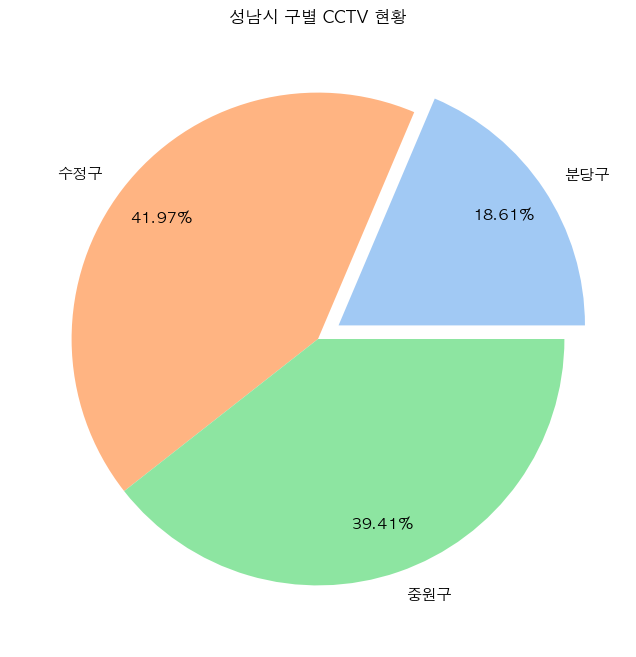

In [32]:
explode = [0.1, 0, 0]
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:10]
plt.pie(ls['설치개수'], labels=ls.index,colors=colors,autopct='%.2f%%',pctdistance=0.8,
       textprops={"fontsize" : 11},explode=explode)
plt.title('성남시 구별 CCTV 현황')
plt.show()

In [42]:
dong = ff.groupby(['dong'])[['설치개수']].sum()
dong_name = dong.index
dong_name

Index(['고등동', '구미1동', '구미동', '금곡동', '금광1동', '금광2동', '단대동', '도촌동', '백현동', '복정동',
       '분당동', '산성동', '삼평동', '상대원1동', '상대원2동', '상대원3동', '서현1동', '서현2동', '성남동',
       '수내3동', '수진1동', '수진2동', '시흥동', '신촌동', '신흥1동', '신흥2동', '신흥3동', '야탑1동',
       '야탑2동', '야탑3동', '양지동', '운중동', '위례동', '은행1동', '은행2동', '이매1동', '이매2동',
       '정자3동', '정자동', '중앙동', '태평1동', '태평2동', '태평3동', '태평4동', '판교동', '하대원동'],
      dtype='object', name='dong')

In [45]:
import re
dong_name1=re.sub(r"[0-9]", "", dong_name[1])
dong_name1

'구미동'

In [46]:
dong_name = dong_name.map(lambda x: re.sub(r"[0-9]", "",x))
dong_name=list(dong_name)

In [74]:
dong.reset_index(drop=True,inplace=True)

In [98]:
dong_group=dong.groupby(['dong'])[['cctv']].sum()
dong_group.reset_index(inplace=True)
dong_group.head()

,dong,cctv
0,고등동,111
1,구미동,157
2,금곡동,83
3,금광동,948
4,단대동,159


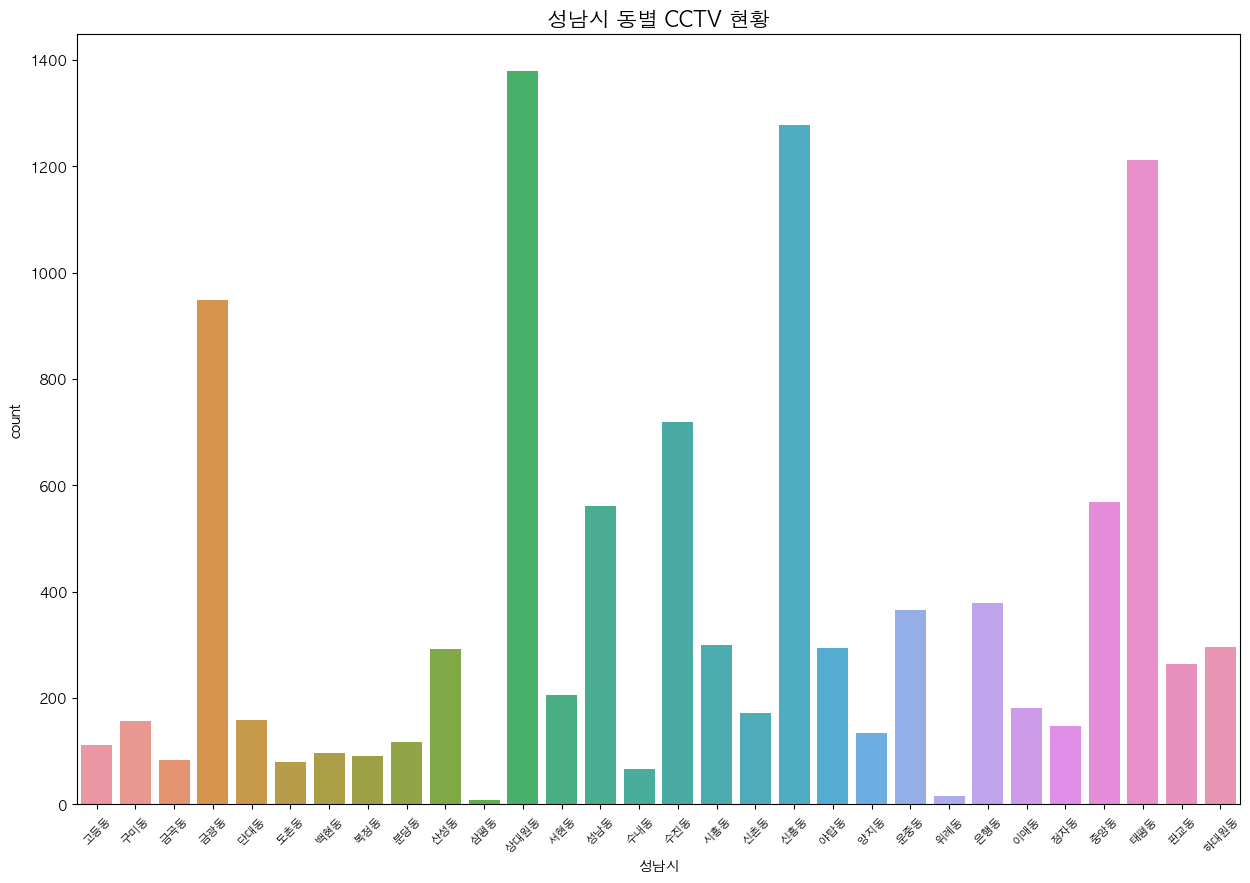

In [100]:
plt.figure(figsize=(15,10))
sns.barplot(data = dong_group, x='dong', y='cctv')
plt.xticks(size=8,rotation=45)
plt.xlabel('성남시')
plt.ylabel('count')
plt.title('성남시 동별 CCTV 현황',size = 15)
plt.show()

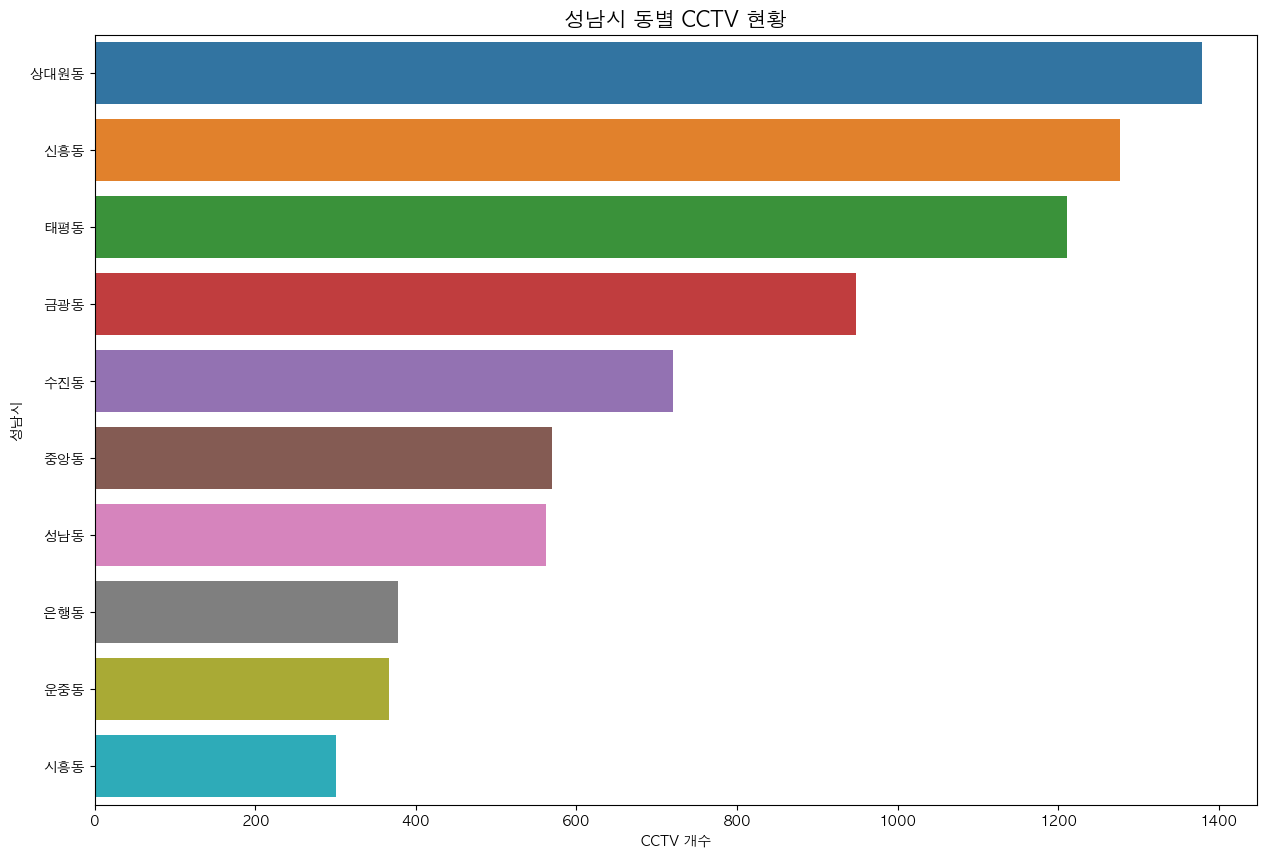

In [121]:
dd1=dong_group.sort_values(by='cctv',ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.color_palette('pastel')
sns.barplot(data = dd1, x='cctv', y='dong')
# plt.xticks(size=8,rotation=45)
plt.ylabel('성남시')
plt.xlabel('CCTV 개수')
plt.title('성남시 동별 CCTV 현황',size = 15)
plt.show()

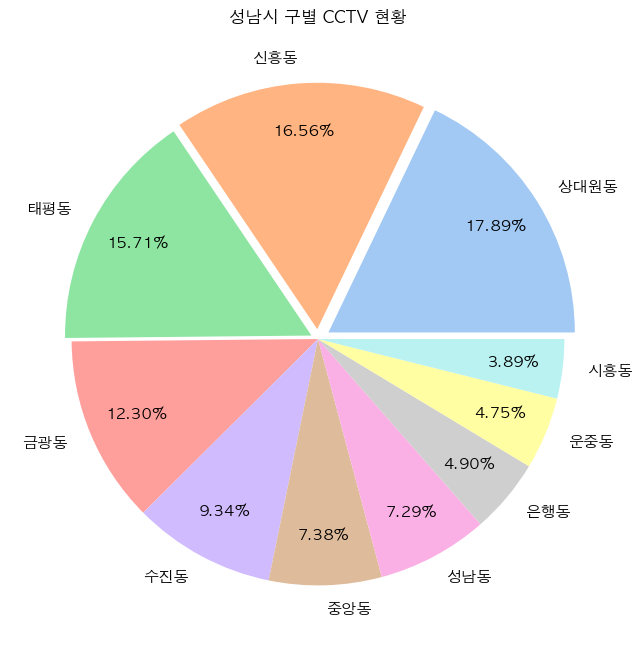

In [132]:
# CCTV 개수 Top 10
dd2=dong_group.sort_values(by='cctv',ascending=False).head(10)
explode = [0.05,0.04,0.03,0,0,0,0,0,0,0]
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:10]
plt.pie(dd2.cctv, labels=dd2.dong,colors=colors,autopct='%.2f%%',pctdistance=0.8,
       textprops={"fontsize" : 11},explode=explode)
plt.title('성남시 구별 CCTV 현황')
plt.show()